# NewChic.com Product and Rating E-commerce Data Analysis

## Overview

This analysis has been done on a data snapshot from August 2020, from https://www.newchic.com/, which is a fashion e-commerce website.

Dataset was downloaded from kaggle.com:
https://www.kaggle.com/jmmvutu/products-and-ratings-of-ecommerce-newchiccom


## Import data and do initial exploring

In [177]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#We will only be importing 6 of the 9 available files
accessories = pd.read_csv("category-accessories.csv")
bags= pd.read_csv("category-bags.csv")
jewelry = pd.read_csv("category-jewelry.csv")
shoes=pd.read_csv("category-shoes.csv")
women=pd.read_csv("category-women.csv")
men=pd.read_csv("category-men.csv")

In [3]:
accessories.head()

,category,subcategory,name,current_price,raw_price,currency,discount,likes_count,is_new,brand,...,variation_0_color,variation_1_color,variation_0_thumbnail,variation_0_image,variation_1_thumbnail,variation_1_image,image_url,url,id,model
0,accessories,Chapeaux & Bonnets,Masques d'isolation de protection du visage Ma...,9.99,16.99,USD,41,373,False,NaN,...,Gray,Blue,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/hats-and-caps-4192/p-16...,1671872,SKUF08305
1,accessories,Baseball Caps,Chapeau de parasol de casquette de baseball en...,9.99,18.99,USD,47,73,False,NaN,...,Navy,Black,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/baseball-caps-12158/p-1...,1674377,SKUF11351
2,accessories,Flat Caps,Casquette Gavroche Cabbie Lvy Flat Hat Vintage...,17.49,37.34,USD,53,140,False,NaN,...,Black,camel,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/flat-caps-12160/p-16377...,1637790,SKUE50978
3,accessories,Cache-oreilles & Masques,Masque à fleurs en coton multicolore Masque vi...,5.99,16.01,USD,63,686,False,NaN,...,#01,#02,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/earmuffsandmouth-maskan...,1654953,SKUE76490
4,accessories,Chapeaux & Bonnets,Chapeau de pêche en plein air pour hommes,13.99,26.99,USD,48,35,False,NaN,...,Black,Army Green,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/hats-and-caps-4192/p-16...,1666600,SKUE75375


In [4]:
accessories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6358 entries, 0 to 6357
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   category               6358 non-null   object 
 1   subcategory            6358 non-null   object 
 2   name                   6358 non-null   object 
 3   current_price          6358 non-null   float64
 4   raw_price              6358 non-null   float64
 5   currency               6358 non-null   object 
 6   discount               6358 non-null   int64  
 7   likes_count            6358 non-null   int64  
 8   is_new                 6358 non-null   bool   
 9   brand                  130 non-null    object 
 10  brand_url              123 non-null    object 
 11  codCountry             5711 non-null   object 
 12  variation_0_color      5894 non-null   object 
 13  variation_1_color      5466 non-null   object 
 14  variation_0_thumbnail  5894 non-null   object 
 15  vari

In [5]:
accessories.describe()

,current_price,raw_price,discount,likes_count,id
count,6358.000000,6358.000000,6358.000000,6358.000000,6.358000e+03
mean,12.151066,25.269439,50.757628,96.496068,1.375095e+06
std,7.138769,33.030292,9.301020,201.796241,2.152210e+05
min,0.220000,0.000000,0.000000,0.000000,3.917400e+04
25%,8.050000,16.410000,47.000000,19.000000,1.215136e+06
50%,11.300000,22.860000,49.000000,44.000000,1.356958e+06
75%,14.610000,29.090000,56.000000,97.000000,1.555829e+06
max,92.990000,2129.930000,100.000000,7277.000000,1.723918e+06


In [6]:
bags.head()

,category,subcategory,name,current_price,raw_price,currency,discount,likes_count,is_new,brand,...,variation_0_color,variation_1_color,variation_0_thumbnail,variation_0_image,variation_1_thumbnail,variation_1_image,image_url,url,id,model
0,bags,Portefeuilles,Gaine multi-outils en cuir véritable EDC ceint...,22.99,45.00,USD,49,174,False,NaN,...,Noir,café,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/chic-wallet-3614/p-1704...,1704506,SKUF57496
1,bags,Portefeuilles,"Sac ceinture EDC Retro en cuir véritable 7,2 p...",23.42,41.87,USD,44,377,False,E Ekphero,...,Brown,Black,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/e-ekphero-chic-wallet-3...,1644205,SKUE46942
2,bags,Portefeuilles,Sac de taille de téléphone en cuir véritable d...,21.99,40.00,USD,45,192,False,NaN,...,Black,Coffee,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/chic-wallet-3614/p-1689...,1689612,SKUF31609
3,bags,Portefeuilles,"EDC en cuir véritable rétro 6,3 pouces sac de ...",19.99,66.63,USD,70,207,False,E Ekphero,...,Noir,marron,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/e-ekphero-chic-wallet-3...,1676960,SKUF18782
4,bags,Sacs à main,Sac à bandoulière en toile imprimé fleur pour ...,33.99,67.00,USD,49,218,False,NaN,...,Bleu,Bleu foncé,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/handbags-3609/p-1697644...,1697644,SKUF51272


In [7]:
bags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6268 entries, 0 to 6267
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   category               6268 non-null   object 
 1   subcategory            6268 non-null   object 
 2   name                   6268 non-null   object 
 3   current_price          6268 non-null   float64
 4   raw_price              6268 non-null   float64
 5   currency               6268 non-null   object 
 6   discount               6268 non-null   int64  
 7   likes_count            6268 non-null   int64  
 8   is_new                 6268 non-null   bool   
 9   brand                  684 non-null    object 
 10  brand_url              584 non-null    object 
 11  codCountry             5015 non-null   object 
 12  variation_0_color      6196 non-null   object 
 13  variation_1_color      5707 non-null   object 
 14  variation_0_thumbnail  6196 non-null   object 
 15  vari

In [8]:
bags.describe()

,current_price,raw_price,discount,likes_count,id
count,6268.000000,6268.000000,6268.000000,6268.000000,6.268000e+03
mean,27.972645,58.896988,51.843172,201.002234,1.378101e+06
std,17.020444,36.393879,9.659438,530.008912,2.180875e+05
min,1.640000,0.000000,0.000000,0.000000,8.933600e+04
25%,15.990000,34.990000,46.000000,29.750000,1.210432e+06
50%,23.870000,49.990000,52.000000,70.000000,1.364150e+06
75%,35.410000,73.410000,58.000000,166.000000,1.577351e+06
max,166.930000,544.870000,92.000000,9465.000000,1.724186e+06


In [9]:
jewelry.head()

,category,subcategory,name,current_price,raw_price,currency,discount,likes_count,is_new,brand,...,variation_0_color,variation_1_color,variation_0_thumbnail,variation_0_image,variation_1_thumbnail,variation_1_image,image_url,url,id,model
0,jewelry,Montres connectées,Global Version Xiaomi Mi bande 5,42.99,99.99,USD,57,27,False,XIAOMI,...,Noir,NaN,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,NaN,NaN,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/xiaomi-smart-watches-49...,1692610,SKUE46513
1,jewelry,Colliers,Collier long pendentif géométrique,17.61,33.55,USD,48,518,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/necklaces-4047/p-151378...,1513785,SKUC71348
2,jewelry,Montres connectées,Montre intelligente ECG EKG,66.29,166.14,USD,60,505,False,Bakeey,...,Rose,rouge,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/bakeey-smart-watches-49...,1409396,SKUA96208
3,jewelry,Colliers,Collier à pampilles blanc,9.99,24.99,USD,60,140,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/necklaces-4047/p-168972...,1689722,SKUF37878
4,jewelry,Boucles d'oreilles,Clips d'oreilles en verre gemme,5.99,10.99,USD,46,107,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/earrings-4041/p-1674308...,1674308,SKUE92041


In [10]:
jewelry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4853 entries, 0 to 4852
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   category               4853 non-null   object 
 1   subcategory            4853 non-null   object 
 2   name                   4853 non-null   object 
 3   current_price          4853 non-null   float64
 4   raw_price              4853 non-null   float64
 5   currency               4853 non-null   object 
 6   discount               4853 non-null   int64  
 7   likes_count            4853 non-null   int64  
 8   is_new                 4853 non-null   bool   
 9   brand                  559 non-null    object 
 10  brand_url              555 non-null    object 
 11  codCountry             4304 non-null   object 
 12  variation_0_color      3686 non-null   object 
 13  variation_1_color      2475 non-null   object 
 14  variation_0_thumbnail  3686 non-null   object 
 15  vari

In [11]:
jewelry.describe()

,current_price,raw_price,discount,likes_count,id
count,4853.000000,4853.000000,4853.000000,4853.000000,4.853000e+03
mean,16.452732,34.999666,53.131877,166.145889,1.369759e+06
std,24.289653,50.370003,11.166705,294.635126,2.075410e+05
min,0.260000,0.000000,0.000000,0.000000,3.007800e+04
25%,7.840000,17.830000,48.000000,37.000000,1.240944e+06
50%,10.350000,21.880000,50.000000,83.000000,1.344586e+06
75%,16.260000,33.320000,58.000000,177.000000,1.510761e+06
max,601.790000,1223.990000,98.000000,5966.000000,1.724649e+06


In [12]:
shoes.head()

,category,subcategory,name,current_price,raw_price,currency,discount,likes_count,is_new,brand,...,variation_0_color,variation_1_color,variation_0_thumbnail,variation_0_image,variation_1_thumbnail,variation_1_image,image_url,url,id,model
0,shoes,Mocassins,Chaussures décontractées antidérapantes en tis...,36.40,72.80,USD,50,873,False,NaN,...,Black,Khaki,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/flats-3616/p-1687903.html,1687903,SKUF29428
1,shoes,Mocassins,Chaussures en cuir à carreaux pour hommes de g...,46.36,106.49,USD,57,358,False,NaN,...,Red,Blue,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/flats-3616/p-1533324.html,1533324,SKUC99128
2,shoes,Mocassins,Chaussures décontractées en cuir pour hommes,43.38,119.98,USD,64,1511,False,Menico,...,Black,Khaki,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/-menico-flats-3616/p-16...,1651734,SKUE68011
3,shoes,Sneakers & Baskets,Baskets plates élastiques en tricot d'épissage,19.99,39.99,USD,50,1873,False,NaN,...,Green,Blue,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/sneakersandathletic-359...,1591892,SKUD85085
4,shoes,Mocassins,Hommes Cuir Épissage Soft Semelle Casual Chaus...,46.18,119.98,USD,62,2738,False,NaN,...,Bleu,Noir,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/flats-3616/p-1474682.html,1474682,SKUC15622


In [13]:
shoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11823 entries, 0 to 11822
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   category               11823 non-null  object 
 1   subcategory            11823 non-null  object 
 2   name                   11823 non-null  object 
 3   current_price          11823 non-null  float64
 4   raw_price              11823 non-null  float64
 5   currency               11823 non-null  object 
 6   discount               11823 non-null  int64  
 7   likes_count            11823 non-null  int64  
 8   is_new                 11823 non-null  bool   
 9   brand                  1475 non-null   object 
 10  brand_url              1462 non-null   object 
 11  codCountry             9264 non-null   object 
 12  variation_0_color      11778 non-null  object 
 13  variation_1_color      10709 non-null  object 
 14  variation_0_thumbnail  11778 non-null  object 
 15  va

In [14]:
shoes.describe()

,current_price,raw_price,discount,likes_count,id
count,11823.000000,11823.000000,11823.000000,11823.000000,1.182300e+04
mean,38.084380,81.751232,53.040768,284.091855,1.455448e+06
std,16.037002,33.351029,9.893180,808.795349,2.041482e+05
min,2.050000,0.000000,0.000000,0.000000,8.959200e+04
25%,25.990000,58.550000,48.000000,31.000000,1.312776e+06
50%,36.790000,76.990000,54.000000,84.000000,1.487538e+06
75%,48.520000,99.460000,58.000000,224.000000,1.641700e+06
max,143.730000,301.130000,90.000000,21547.000000,1.724666e+06


In [15]:
women.head()

,category,subcategory,name,current_price,raw_price,currency,discount,likes_count,is_new,brand,...,variation_0_color,variation_1_color,variation_0_thumbnail,variation_0_image,variation_1_thumbnail,variation_1_image,image_url,url,id,model
0,women,T-shirts,T-shirt boutonné à manches courtes et imprimé ...,23.99,46.99,USD,49,313,False,NaN,...,White,Navy,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/t-shirts-3666/p-1690810...,1690810,SKUF40137
1,women,Soutiens-gorge,Plus Soutiens-gorge avec fermeture à l'avant,15.99,40.36,USD,60,4603,False,NaN,...,blanc,gris,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/bra-and-bra-set-4183/p-...,1533303,SKUC91583
2,women,Pantalons & Shorts,Pantalon décontracté à taille élastique de cou...,25.99,50.99,USD,49,5564,False,NaN,...,Khaki,Black,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/pants-and-capris-3674/p...,1661710,SKUE94621
3,women,Robes imprimées,Robe midi décontractée à imprimé floral,23.99,46.99,USD,49,1262,False,NaN,...,Khaki,White,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/print-dresses-3677/p-16...,1691484,SKUF41372
4,women,T-shirts,T-shirt brodé de fleurs,15.99,38.88,USD,59,4485,False,NaN,...,Green,Sky Blue,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/t-shirts-3666/p-1655044...,1655044,SKUE83526


In [16]:
women.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14809 entries, 0 to 14808
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   category               14809 non-null  object 
 1   subcategory            14809 non-null  object 
 2   name                   14809 non-null  object 
 3   current_price          14809 non-null  float64
 4   raw_price              14809 non-null  float64
 5   currency               14809 non-null  object 
 6   discount               14809 non-null  int64  
 7   likes_count            14809 non-null  int64  
 8   is_new                 14809 non-null  bool   
 9   brand                  4816 non-null   object 
 10  brand_url              1594 non-null   object 
 11  codCountry             14264 non-null  object 
 12  variation_0_color      14773 non-null  object 
 13  variation_1_color      11627 non-null  object 
 14  variation_0_thumbnail  14773 non-null  object 
 15  va

In [17]:
women.describe()

,current_price,raw_price,discount,likes_count,id
count,14809.000000,14809.000000,14809.000000,14809.000000,1.480900e+04
mean,24.482454,54.674162,55.160443,238.167331,1.494756e+06
std,11.306864,23.416214,8.301365,651.856810,2.090150e+05
min,0.140000,0.000000,0.000000,0.000000,2.792800e+04
25%,17.770000,41.280000,49.000000,32.000000,1.338755e+06
50%,23.190000,51.790000,54.000000,82.000000,1.570424e+06
75%,28.990000,63.300000,59.000000,213.000000,1.673048e+06
max,188.990000,404.810000,99.000000,21403.000000,1.722104e+06


In [18]:
men.head()

,category,subcategory,name,current_price,raw_price,currency,discount,likes_count,is_new,brand,...,variation_0_color,variation_1_color,variation_0_thumbnail,variation_0_image,variation_1_thumbnail,variation_1_image,image_url,url,id,model
0,men,Undershirt,Sous-vêtements amincissants de contrôle du ven...,16.99,39.97,USD,58,382,False,NaN,...,Black,White,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/mens-shapewear-8149/p-1...,1626609,SKUE30713
1,men,Shirts,Chemises à manches courtes à rayures,17.99,35.98,USD,50,275,False,NaN,...,Black strip,Rayure bleue,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/shirts-12209/p-1696680....,1696680,SKUF37566
2,men,Henley Shirts,Chemise Henley en lin respirant pour homme,16.98,39.99,USD,58,3686,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/henley-shirts-12211/p-1...,1676437,SKUE55668
3,men,Slips,Pochette Cosy Modal Underwear,8.99,17.98,USD,50,50,False,NaN,...,Rose,vert,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/briefs-4977/p-1692052.html,1692052,SKUF24928
4,men,Pyjama,Pyjama confortable en coton et lin,31.35,45.26,USD,31,140,False,NaN,...,Grey,Blue,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/pajamas-sets-6150/p-165...,1658681,SKUE87235


In [19]:
men.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10208 entries, 0 to 10207
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   category               10208 non-null  object 
 1   subcategory            10208 non-null  object 
 2   name                   10208 non-null  object 
 3   current_price          10208 non-null  float64
 4   raw_price              10208 non-null  float64
 5   currency               10208 non-null  object 
 6   discount               10208 non-null  int64  
 7   likes_count            10208 non-null  int64  
 8   is_new                 10208 non-null  bool   
 9   brand                  1941 non-null   object 
 10  brand_url              1913 non-null   object 
 11  codCountry             9658 non-null   object 
 12  variation_0_color      9992 non-null   object 
 13  variation_1_color      7858 non-null   object 
 14  variation_0_thumbnail  9992 non-null   object 
 15  va

In [20]:
men.describe()

,current_price,raw_price,discount,likes_count,id
count,10208.000000,10208.000000,10208.000000,10208.000000,1.020800e+04
mean,27.142447,49.404506,45.063382,189.218456,1.504276e+06
std,18.079564,58.419787,11.769204,501.523420,1.865895e+05
min,1.150000,0.000000,0.000000,0.000000,7.712200e+04
25%,17.990000,33.940000,36.000000,24.000000,1.354580e+06
50%,21.990000,40.990000,47.000000,65.000000,1.558383e+06
75%,31.490000,53.990000,50.000000,164.250000,1.674635e+06
max,314.590000,5089.000000,100.000000,11521.000000,1.722015e+06


### Observations:

We can see that all files have the same 22 columns. We will first append the files into a single dataframe, so we only have to apply some of the data cleaning operations once.

## Append the dataframes


In [21]:
#The master dataframe for our dataset will be called newchic. Create a list of all dataframes, except the first one, and perform a single append operation

In [22]:
dataframelist=[bags,jewelry,shoes,women,men]

In [23]:
newchic=accessories.append(dataframelist)

In [24]:
newchic.head()

,category,subcategory,name,current_price,raw_price,currency,discount,likes_count,is_new,brand,...,variation_0_color,variation_1_color,variation_0_thumbnail,variation_0_image,variation_1_thumbnail,variation_1_image,image_url,url,id,model
0,accessories,Chapeaux & Bonnets,Masques d'isolation de protection du visage Ma...,9.99,16.99,USD,41,373,False,NaN,...,Gray,Blue,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/hats-and-caps-4192/p-16...,1671872,SKUF08305
1,accessories,Baseball Caps,Chapeau de parasol de casquette de baseball en...,9.99,18.99,USD,47,73,False,NaN,...,Navy,Black,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/baseball-caps-12158/p-1...,1674377,SKUF11351
2,accessories,Flat Caps,Casquette Gavroche Cabbie Lvy Flat Hat Vintage...,17.49,37.34,USD,53,140,False,NaN,...,Black,camel,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/flat-caps-12160/p-16377...,1637790,SKUE50978
3,accessories,Cache-oreilles & Masques,Masque à fleurs en coton multicolore Masque vi...,5.99,16.01,USD,63,686,False,NaN,...,#01,#02,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/earmuffsandmouth-maskan...,1654953,SKUE76490
4,accessories,Chapeaux & Bonnets,Chapeau de pêche en plein air pour hommes,13.99,26.99,USD,48,35,False,NaN,...,Black,Army Green,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/hats-and-caps-4192/p-16...,1666600,SKUE75375


In [25]:
#How many rows do we have now ?
newchic.shape

(54319, 22)

In [26]:
#54319 rows and 22 columns. We will not use all columns. Next lets get rid of unnecessary data

## Remove Unwanted Observations

In [27]:
newchic.isnull().sum()

category                     0
subcategory                  0
name                         0
current_price                0
raw_price                    0
currency                     0
discount                     0
likes_count                  0
is_new                       0
brand                    44714
brand_url                48088
codCountry                6103
variation_0_color         2000
variation_1_color        10477
variation_0_thumbnail     2000
variation_0_image         2000
variation_1_thumbnail    10477
variation_1_image        10477
image_url                    0
url                          0
id                           0
model                        0
dtype: int64

In [28]:
#We will call our cleaned dataframe newchic_cleaned
#We have no use for the following colums:
#variation_0_color         
#variation_1_color        
#variation_0_thumbnail     
#variation_0_image        
#variation_1_thumbnail    
#variation_1_image    
#We can go ahead and drop these

In [29]:
newchic_cleaned=newchic.drop(['variation_0_color','variation_1_color','variation_0_thumbnail','variation_0_image','variation_1_thumbnail','variation_1_image'], axis=1)

In [30]:
newchic_cleaned.head()

,category,subcategory,name,current_price,raw_price,currency,discount,likes_count,is_new,brand,brand_url,codCountry,image_url,url,id,model
0,accessories,Chapeaux & Bonnets,Masques d'isolation de protection du visage Ma...,9.99,16.99,USD,41,373,False,NaN,NaN,"ID,MY,PH,SG,TH,VN",https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/hats-and-caps-4192/p-16...,1671872,SKUF08305
1,accessories,Baseball Caps,Chapeau de parasol de casquette de baseball en...,9.99,18.99,USD,47,73,False,NaN,NaN,"ID,MY,PH,SG,TH,VN",https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/baseball-caps-12158/p-1...,1674377,SKUF11351
2,accessories,Flat Caps,Casquette Gavroche Cabbie Lvy Flat Hat Vintage...,17.49,37.34,USD,53,140,False,NaN,NaN,"ID,MY,PH,SG,TH,VN",https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/flat-caps-12160/p-16377...,1637790,SKUE50978
3,accessories,Cache-oreilles & Masques,Masque à fleurs en coton multicolore Masque vi...,5.99,16.01,USD,63,686,False,NaN,NaN,"ID,MY,PH,SG,TH,VN",https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/earmuffsandmouth-maskan...,1654953,SKUE76490
4,accessories,Chapeaux & Bonnets,Chapeau de pêche en plein air pour hommes,13.99,26.99,USD,48,35,False,NaN,NaN,"ID,MY,PH,SG,TH,VN",https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/hats-and-caps-4192/p-16...,1666600,SKUE75375


In [31]:
#For the brand column, we have 44714 null values
(44714/54319)*100

82.31742116018336

In [32]:
#82% null values for the brand column. Lets see what other values are contained in this column"
newchic_cleaned["brand"].value_counts()

ZANZEA             1683
ChArmkpR            952
O-NEWE              869
Socofy              722
INCERUN             507
                   ... 
JINBAOLAI             1
TwentySeventeen       1
Pioneer camp          1
Meibin                1
OBAOLAY               1
Name: brand, Length: 195, dtype: int64

In [33]:
#Can we deduce a brand name from the brand URL column ?
nobrand=newchic_cleaned[newchic_cleaned["brand"].isnull()]

In [34]:
nobrand["brand_url"].value_counts()

Series([], Name: brand_url, dtype: int64)

In [35]:
#We can see this will not work. Replacing >80% of the column's values with a string such as "Unknown brand" will not be helpful in our analysis. We can thus drop both these columns

In [36]:
newchic_cleaned=newchic_cleaned.drop(["brand","brand_url"], axis=1)

In [37]:
#We will also not be making use of the image_url and url columns for this analysis:
newchic_cleaned=newchic_cleaned.drop(["image_url","url"], axis=1)

In [38]:
newchic_cleaned.head()

,category,subcategory,name,current_price,raw_price,currency,discount,likes_count,is_new,codCountry,id,model
0,accessories,Chapeaux & Bonnets,Masques d'isolation de protection du visage Ma...,9.99,16.99,USD,41,373,False,"ID,MY,PH,SG,TH,VN",1671872,SKUF08305
1,accessories,Baseball Caps,Chapeau de parasol de casquette de baseball en...,9.99,18.99,USD,47,73,False,"ID,MY,PH,SG,TH,VN",1674377,SKUF11351
2,accessories,Flat Caps,Casquette Gavroche Cabbie Lvy Flat Hat Vintage...,17.49,37.34,USD,53,140,False,"ID,MY,PH,SG,TH,VN",1637790,SKUE50978
3,accessories,Cache-oreilles & Masques,Masque à fleurs en coton multicolore Masque vi...,5.99,16.01,USD,63,686,False,"ID,MY,PH,SG,TH,VN",1654953,SKUE76490
4,accessories,Chapeaux & Bonnets,Chapeau de pêche en plein air pour hommes,13.99,26.99,USD,48,35,False,"ID,MY,PH,SG,TH,VN",1666600,SKUE75375


In [39]:
#Can we make use of the id or model columns as an index?
newchic_cleaned.duplicated(subset=['id'], keep='first').value_counts()

False    54074
True       245
dtype: int64

In [40]:
newchic_cleaned.duplicated(subset=['model'], keep='first').value_counts()

False    54074
True       245
dtype: int64

In [41]:
#We can see that there are indeed duplicate values, and we can now ask the question whether we have duplicate rows ?
newchic_cleaned.duplicated().value_counts()

False    54075
True       244
dtype: int64

In [42]:
#Drop duplicate rows, as we have 244 duplicated rows
newchic_cleaned.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=False)

In [43]:
newchic_cleaned.shape

(54075, 12)

In [44]:
newchic_cleaned.duplicated(subset=['id'], keep='first').value_counts()

False    54074
True         1
dtype: int64

In [45]:
newchic_cleaned.duplicated(subset=['model'], keep='first').value_counts()

False    54074
True         1
dtype: int64

In [46]:
newchic_cleaned[newchic_cleaned.duplicated(subset=['model','id'])]

,category,subcategory,name,current_price,raw_price,currency,discount,likes_count,is_new,codCountry,id,model
6313,men,Overcoats,Pardessus Épais Chaud à Double Encolure,29.99,139.6,USD,79,2890,False,NaN,1094579,SKU499081


In [47]:
newchic_cleaned[newchic_cleaned['model']=='SKU499081']

,category,subcategory,name,current_price,raw_price,currency,discount,likes_count,is_new,codCountry,id,model
1782,shoes,Flat & Loafers,Pardessus Épais Chaud à Double Encolure,87.99,139.6,USD,37,2893,False,NaN,1094579,SKU499081
6313,men,Overcoats,Pardessus Épais Chaud à Double Encolure,29.99,139.6,USD,79,2890,False,NaN,1094579,SKU499081


In [48]:
#We can see the above are in fact 2 different products, so for now we will not change the index to model or id

In [49]:
#Is all pricing in usd ?
newchic_cleaned["currency"].value_counts()

USD    54075
Name: currency, dtype: int64

In [50]:
#Yes, so we can drop the column and rename our pricing columns

In [51]:
newchic_cleaned=newchic_cleaned.drop("currency", axis=1)

In [52]:
newchic_cleaned['codCountry']=newchic_cleaned['codCountry'].mask(newchic_cleaned['codCountry'].isnull(),"Not specified")

In [53]:
newchic_cleaned.isnull().sum()
#No more null values

category         0
subcategory      0
name             0
current_price    0
raw_price        0
discount         0
likes_count      0
is_new           0
codCountry       0
id               0
model            0
dtype: int64

## Rename columns and check datatypes

In [95]:
newchic_cleaned.rename(columns={'current_price':'current_price_usd','raw_price':'raw_price_usd','codCountry':'cod_country'}, inplace=True)

In [55]:
newchic_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54075 entries, 0 to 10207
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   category           54075 non-null  object 
 1   subcategory        54075 non-null  object 
 2   name               54075 non-null  object 
 3   current_price_usd  54075 non-null  float64
 4   raw_price_usd      54075 non-null  float64
 5   discount           54075 non-null  int64  
 6   likes_count        54075 non-null  int64  
 7   is_new             54075 non-null  bool   
 8   cod_Country        54075 non-null  object 
 9   id                 54075 non-null  int64  
 10  model              54075 non-null  object 
dtypes: bool(1), float64(2), int64(3), object(5)
memory usage: 4.6+ MB


In [56]:
#All columns have the correct datatype

In [109]:
newchic_cleaned.head()

,category,subcategory,name,current_price_usd,raw_price_usd,discount,likes_count,is_new,cod_Country,id,model,price_difference_usd
0,accessories,Chapeaux & Bonnets,Masques d'isolation de protection du visage Ma...,9.99,16.99,41,373,False,"ID,MY,PH,SG,TH,VN",1671872,SKUF08305,7.00
1,accessories,Baseball Caps,Chapeau de parasol de casquette de baseball en...,9.99,18.99,47,73,False,"ID,MY,PH,SG,TH,VN",1674377,SKUF11351,9.00
2,accessories,Flat Caps,Casquette Gavroche Cabbie Lvy Flat Hat Vintage...,17.49,37.34,53,140,False,"ID,MY,PH,SG,TH,VN",1637790,SKUE50978,19.85
3,accessories,Cache-oreilles & Masques,Masque à fleurs en coton multicolore Masque vi...,5.99,16.01,63,686,False,"ID,MY,PH,SG,TH,VN",1654953,SKUE76490,10.02
4,accessories,Chapeaux & Bonnets,Chapeau de pêche en plein air pour hommes,13.99,26.99,48,35,False,"ID,MY,PH,SG,TH,VN",1666600,SKUE75375,13.00


## Add calculated column


In [58]:
#Add a column to see if a profit is made or if the customer saves with the discount

In [72]:
newchic_cleaned["price_difference_usd"]=newchic_cleaned["raw_price_usd"]-newchic_cleaned["current_price_usd"]

In [73]:
newchic_cleaned["price_difference_usd"].head()

0     7.00
1     9.00
2    19.85
3    10.02
4    13.00
Name: price_difference_usd, dtype: float64

## Basic analysis questions

### How many unique subcategories are in the dataset ?

In [81]:
len(newchic_cleaned['subcategory'].value_counts())

202

### Which subcategory contains the most items ?

In [85]:
newchic_cleaned[newchic_cleaned['subcategory']=='Chapeaux & Bonnets'].shape[0]

965

In [96]:
max_items=0
#list all subcategories
subcategories_list=newchic_cleaned['subcategory'].value_counts().index.tolist()
#check each subcategory to see how many items it contains
for s in subcategories_list:
    subcategory_items=newchic_cleaned[newchic_cleaned['subcategory']==s].shape[0]
    if subcategory_items>max_items:
        max_items=subcategory_items
        max_subcategory=s
#Print results        
print(max_subcategory,": ",max_items," items")

Shirts :  2824  items


### Which item received the most likes on the website ?

In [97]:
newchic_cleaned[newchic_cleaned['likes_count']==newchic_cleaned['likes_count'].max()]

,category,subcategory,name,current_price_usd,raw_price_usd,discount,likes_count,is_new,cod_Country,id,model,price_difference_usd
7309,shoes,Derbies & Mocassins,Chaussures Plats Décontractées En Suède Mocass...,14.99,54.95,73,21547,False,"ID,MY,PH,SG,TH,VN",1107438,SKU532490,39.96


### How many new items and how many older items ?

In [108]:
new_items=newchic_cleaned[newchic_cleaned['is_new']==True].shape[0]
old_items=newchic_cleaned[newchic_cleaned['is_new']==False].shape[0]
total_items=newchic_cleaned.shape[0]
print("New items :",new_items," ",round((new_items/total_items*100),2),"%")
print("Old items :",old_items," ",round((old_items/total_items*100),2),"%")

New items : 2078   3.84 %
Old items : 51997   96.16 %


### Which countries are eligible for cod in this dataset ?

In [113]:
#define a function to capture all country codes in a list:
country_code_list=[]
def get_country_code(country_codes):
    temp_list=country_codes.split(",")
    for c in temp_list:
        if c not in country_code_list:
            country_code_list.append(c)
            
#call the function on the cod_Country column:
newchic_cleaned["cod_Country"].apply(get_country_code)
print(country_code_list)
    

['ID', 'MY', 'PH', 'SG', 'TH', 'VN', 'Not specified']


In [115]:
#We can look for the meaning of the codes in the list found here:
#https://datahub.io/core/country-list/r/0.html
countries= pd.read_csv("country_codes.csv")
countries.head()

,Name,Code
0,Afghanistan,AF
1,Ã…land Islands,AX
2,Albania,AL
3,Algeria,DZ
4,American Samoa,AS


In [126]:
for code in country_code_list:
    print(countries[countries['Code']==code].iloc[:,0])

103    Indonesia
Name: Name, dtype: object
134    Malaysia
Name: Name, dtype: object
174    Philippines
Name: Name, dtype: object
199    Singapore
Name: Name, dtype: object
220    Thailand
Name: Name, dtype: object
241    Viet Nam
Name: Name, dtype: object
Series([], Name: Name, dtype: object)


## Basic visualisations

### How do the number of items compare in the different subcategories of the women's department ?

In [131]:
womens=newchic_cleaned[newchic_cleaned["category"]=='women']

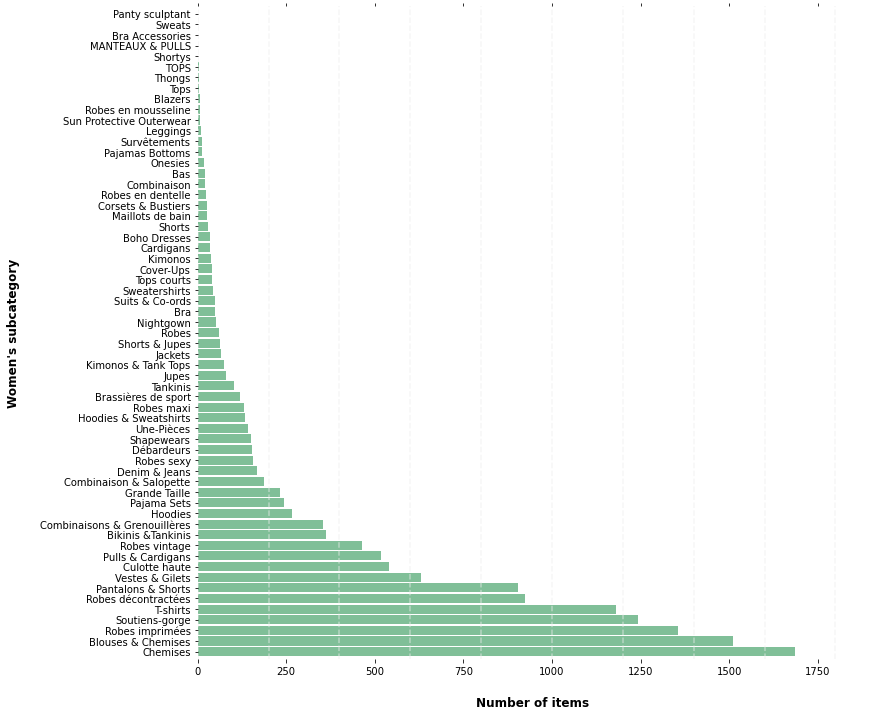

In [147]:
ax=womens["subcategory"].value_counts().plot(kind='barh', figsize=(12, 12), color='#80bf98', width=0.85)
#Remove spines and ticks
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on")
#Set labels
ax.set_xlabel("Number of items", labelpad=20, weight='bold', size=12)
ax.set_ylabel("Women's subcategory", labelpad=20, weight='bold', size=12)
#Draw vertical lines
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.5, color='#eeeeee', zorder=1)
plt.show()

### Which 10 subcategories in the means department, received the highest number of likes on average ?

In [149]:
mens_likes = newchic_cleaned.groupby('subcategory')['likes_count'].mean().sort_values().head(10)

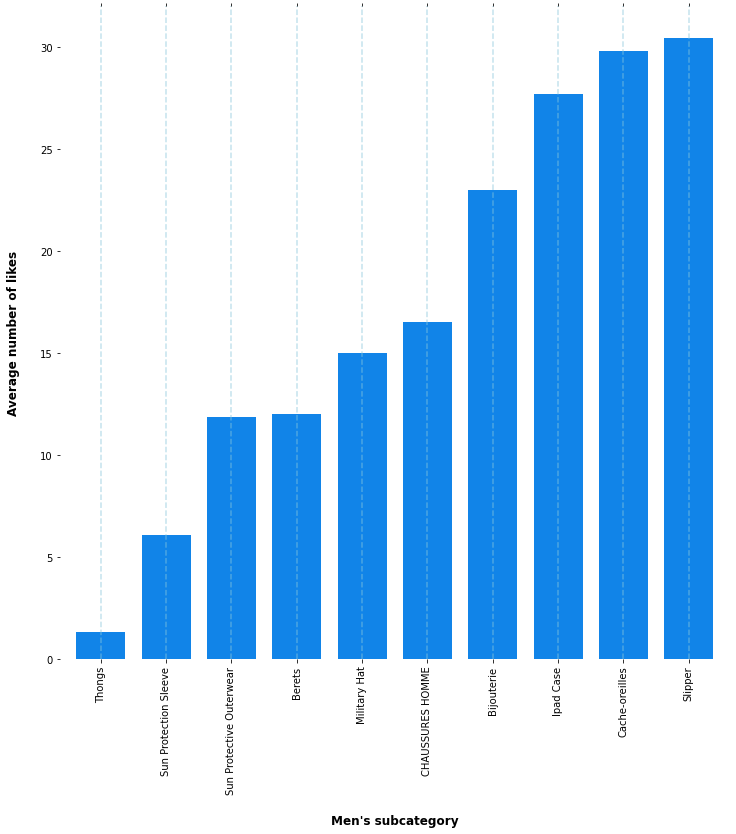

In [155]:
ax=mens_likes.plot(kind='bar', figsize=(12, 12), color='#1184e8', width=0.75)
#Remove spines and ticks
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on")
#Set labels
ax.set_xlabel("Men's subcategory", labelpad=20, weight='bold', size=12)
ax.set_ylabel("Average number of likes", labelpad=20, weight='bold', size=12)
#Draw vertical lines
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.5, color='#88c7dc', zorder=1)
plt.show()

### Is there any relationship between the discount% applied and the raw price of an item ?

[]

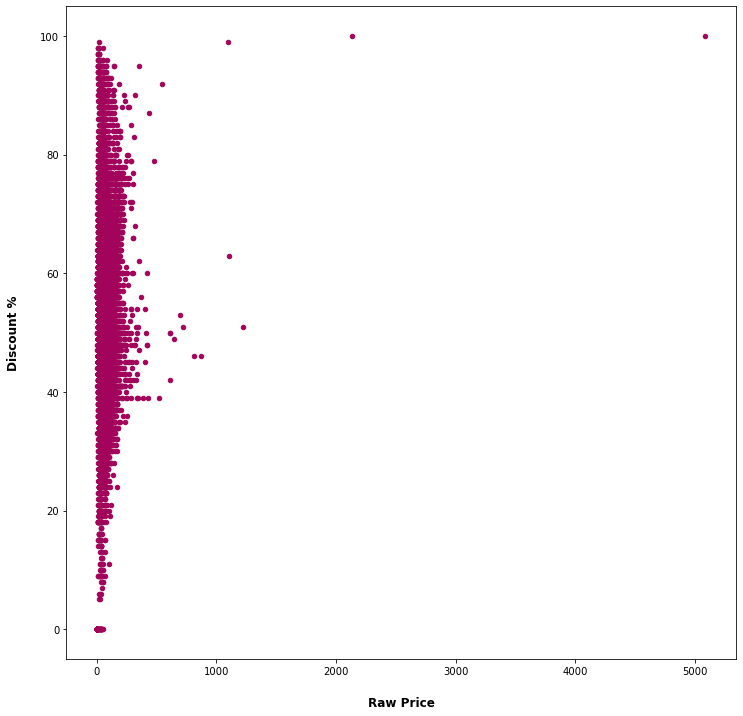

In [165]:
ax1=newchic_cleaned.plot(kind='scatter',x='raw_price_usd', y='discount',figsize=(12, 12), color='#a1045a')
#Set labels
ax1.set_xlabel("Raw Price", labelpad=20, weight='bold', size=12)
ax1.set_ylabel("Discount %", labelpad=20, weight='bold', size=12)
ax1.plot()


In [166]:
# We can see that mostly items in the cheaper price range have discounts applied !

### Is there any relationship between the current price the number of likes of an item ?

[]

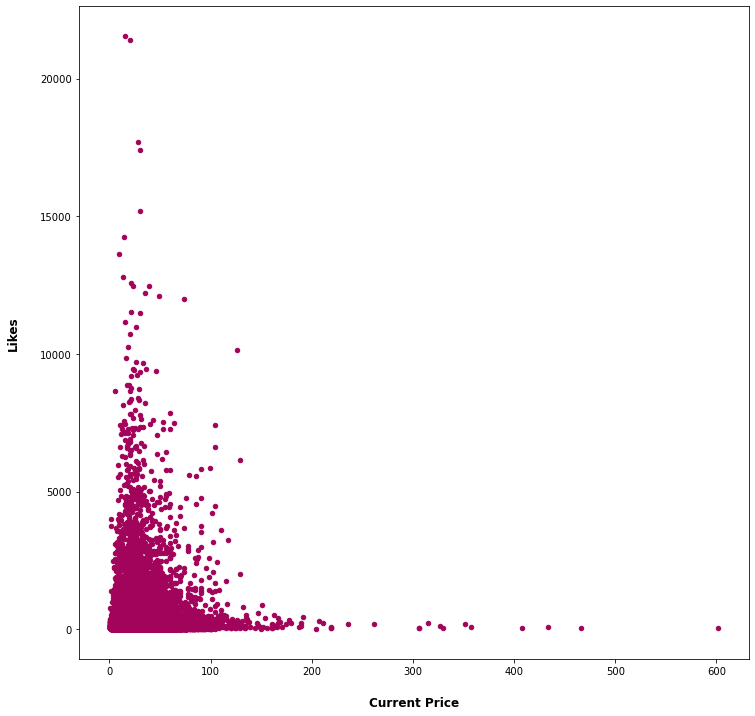

In [171]:
ax1=newchic_cleaned.plot(kind='scatter',x='current_price_usd', y='likes_count',figsize=(12, 12), color='#a1045a')
#Set labels
ax1.set_xlabel("Current Price", labelpad=20, weight='bold', size=12)
ax1.set_ylabel("Likes", labelpad=20, weight='bold', size=12)
ax1.plot()

In [172]:
#We can see that mostly products priced below $200 received the most likes

### What is the average current  price of a pair of shoes ?

In [174]:
# First lets look for any unusual outliers

In [175]:
shoes_grouped=newchic_cleaned[newchic_cleaned['category']=='shoes'].groupby(['current_price_usd']).count().reset_index()

<AxesSubplot:xlabel='current_price_usd', ylabel='category'>

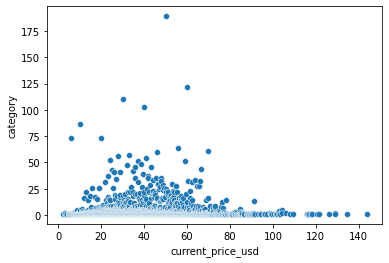

In [179]:
sns.scatterplot(x='current_price_usd', y='category', data=shoes_grouped)

In [180]:
#We can see there are not any extreme outliers in terms of shoe price

In [184]:
shoes_df=newchic_cleaned[newchic_cleaned['category']=='shoes']

In [189]:
print("Average price of shoes :$",round(shoes_df["current_price_usd"].mean(),2))

Average price of shoes :$ 38.09
